In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Load the data
training_file = "/content/drive/MyDrive/Dataset/German Traffic Sign/train.p"
testing_file = "/content/drive/MyDrive/Dataset/German Traffic Sign/test.p"   
 
# Open and load the training file 
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
 
# Open and load the testing file
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
print("Data loaded")

Data loaded


In [ ]:
## Buat pandas dataframe untuk load data csv
## File csv ini berupa ClassId dan SignName
 
sign_name_df = pd.read_csv('/content/drive/MyDrive/Dataset/German Traffic Sign/signnames.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [ ]:
# Definisikan fitur dan label untuk data training
X, y = train['features'], train['labels']
 
# Mengubah lists menjadi numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)
 
# Definisikan fitur dan label untuk data testing
X_test, y_test = test['features'], test['labels']
 
# Mengubah lists menjadi numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


In [ ]:
# Split training data into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


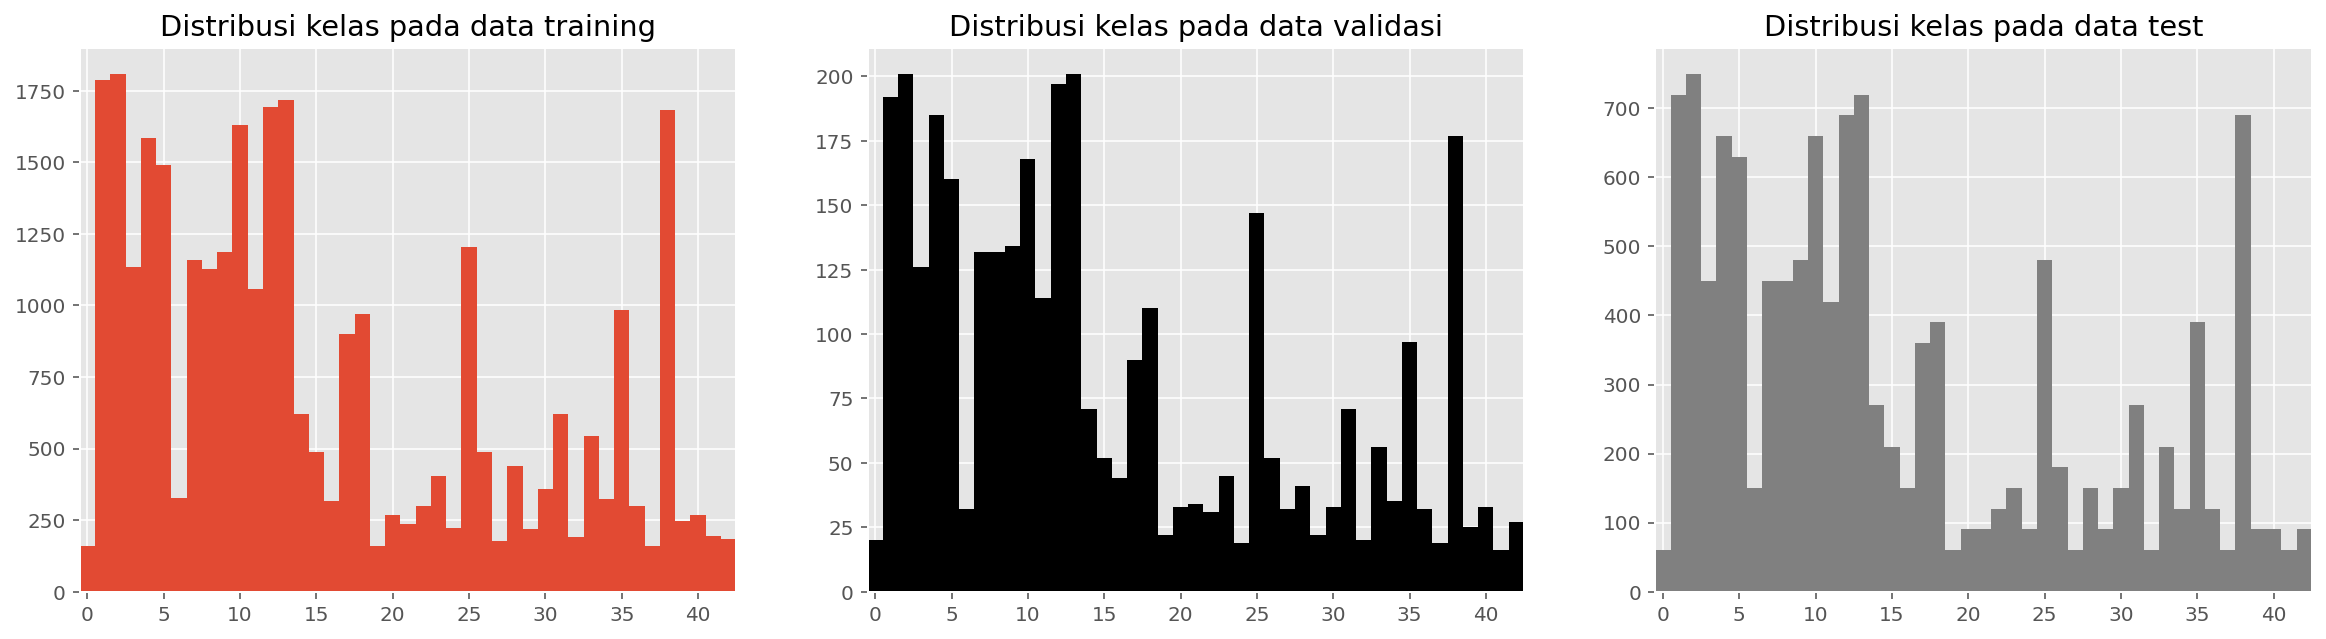

In [ ]:
n_labels = np.unique(y_train).size
def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)
        
fig,ax = plt.subplots(1,3, figsize=(20,5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

In [ ]:
# Konversi label dengan teknik one hot encoding
from tensorflow.keras.utils import to_categorical
 
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi telah mencapai >96%. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])
model.save("my_model.h5")

Epoch 1/25
979/979 [==============================] - 164s 166ms/step - loss: 1.8330 - accuracy: 0.5446 - val_loss: 0.4721 - val_accuracy: 0.8943
Epoch 2/25
979/979 [==============================] - 163s 166ms/step - loss: 0.6312 - accuracy: 0.8123 - val_loss: 0.1846 - val_accuracy: 0.9509
Epoch 3/25
979/979 [==============================] - 161s 165ms/step - loss: 0.4708 - accuracy: 0.8596 - val_loss: 0.1796 - val_accuracy: 0.9532
Epoch 4/25
979/979 [==============================] - 158s 162ms/step - loss: 0.3805 - accuracy: 0.8881 - val_loss: 0.1052 - val_accuracy: 0.9724
Epoch 5/25
979/979 [==============================] - 158s 161ms/step - loss: 0.3212 - accuracy: 0.9034 - val_loss: 0.1480 - val_accuracy: 0.9592
Epoch 6/25
979/979 [==============================] - 155s 158ms/step - loss: 0.3062 - accuracy: 0.9072 - val_loss: 0.0935 - val_accuracy: 0.9750
Epoch 7/25
979/979 [==============================] - 155s 158ms/step - loss: 0.2772 - accuracy: 0.9186 - val_loss: 0.1397 -

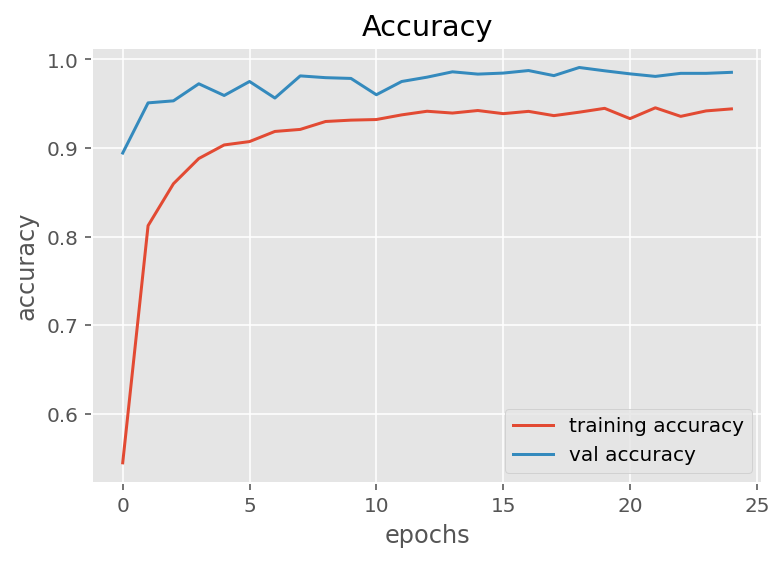

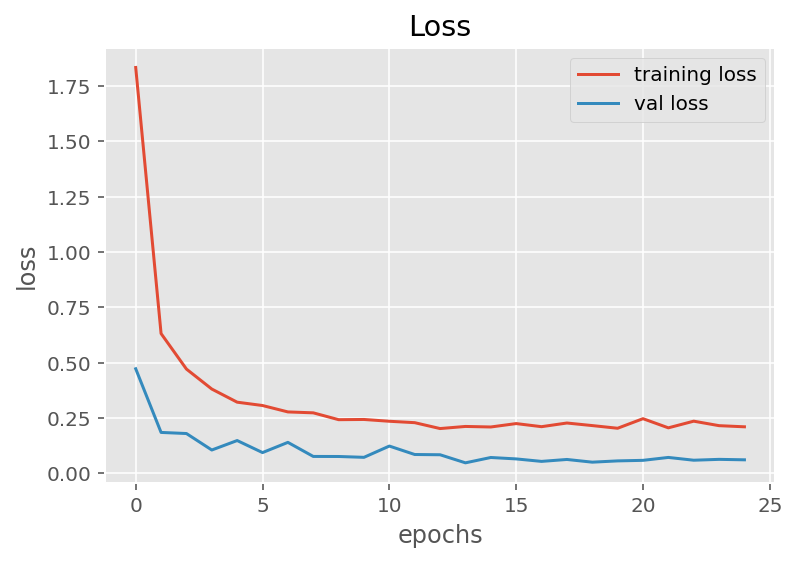

In [ ]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Testing accuracy with the test data
from sklearn.metrics import accuracy_score
 
pred=np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

0.9423594615993666

 Menurut dokumentasi scikit-learn, fungsi ini menghitung akurasi subset pada klasifikasi banyak kelas. Dengan catatan, kumpulan label yang diprediksi untuk sampel harus sama persis dengan kumpulan label sebenarnya. Dalam hal ini, kumpulan label yang sebenarnya adalah label pada data y_test. Sedangkan label prediksi, didefinisikan dengan fungsi model.predict() untuk data pada X_test kemudian dimasukkan pada variabel pred.

In [ ]:
# Calculate metrics for classification
from sklearn.metrics import classification_report
 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.93      0.98      0.96       720
           2       0.93      0.98      0.96       750
           3       0.92      0.94      0.93       450
           4       1.00      0.94      0.97       660
           5       0.93      0.86      0.89       630
           6       1.00      0.78      0.88       150
           7       0.89      0.94      0.91       450
           8       0.94      0.96      0.95       450
           9       0.98      1.00      0.99       480
          10       0.99      0.98      0.98       660
          11       0.98      0.91      0.94       420
          12       0.95      0.98      0.97       690
          13       0.98      0.99      0.99       720
          14       0.97      0.99      0.98       270
          15       0.98      0.99      0.98       210
          16       0.99      0.98      0.99       150
          17       0.99    

Jika diperhatikan pada hampir semua kelas, akurasi precision, recall, dan f1-score memiliki angka yang tinggi, rata-rata di atas 90-an. Namun, pada beberapa kelas seperti kelas dengan indeks 27 dan 42, akurasi rata-ratanya berada dibawah 80%. Hal ini bisa disebabkan oleh representasi fitur yang cukup kompleks dari kedua kelas ini.